# Image Processing

In [11]:
import skimage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread, imshow
from skimage.feature import hog
from skimage import exposure

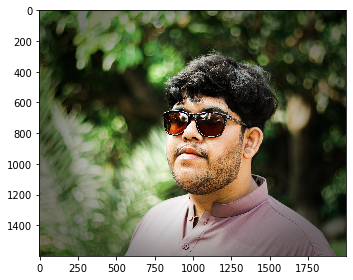

In [7]:
pic = imread('image_process.jpeg')
imshow(pic);

In [23]:
# from skimage.transform import resize

# picchanged = resize(pic,(256,128))

fd, hogimg = hog(pic,orientations=9,cells_per_block=(8, 8),visualize=True,feature_vector=True,multichannel=None,)
hogimg

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.06629126,  0.        ],
       ...,
       [ 0.        ,  3.92754862,  0.        , ...,  0.        ,
         0.18961816,  0.        ],
       [ 0.        ,  0.        , 11.84014416, ...,  0.23102954,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Text(0.5, 1.0, 'The Black Gay')

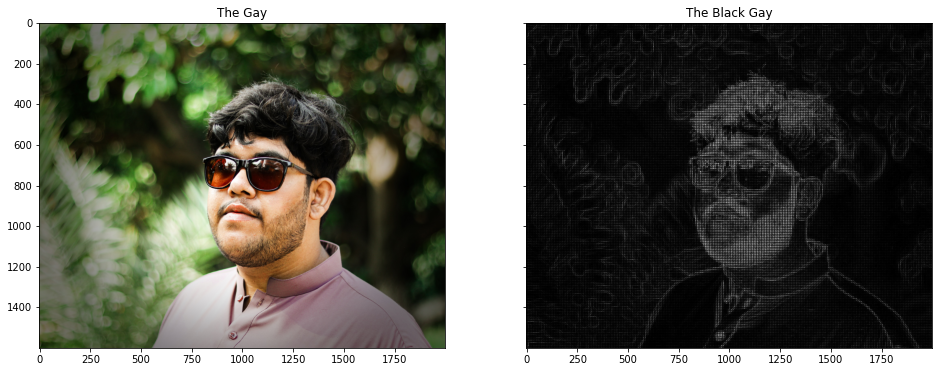

In [24]:
fig, (plot1,plot2) = plt.subplots(1,2,figsize=(16,8),sharex=True, sharey=True)

plot1.imshow(pic,cmap=plt.cm.gray);
plot1.set_title('The Gay')

hog_image_rescaled = exposure.rescale_intensity(hogimg, in_range=(0, 10))

plot2.imshow(hog_image_rescaled,cmap=plt.cm.gray);
plot2.set_title('The Black Gay')


# Train Test Split

In [30]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier

In [34]:
iris_df = pd.read_csv('iris_csv.csv')
iris_df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
X = iris_df.drop('class', axis = 1)
Y = iris_df['class']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.2,random_state=51)

sc = StandardScaler()
sc.fit(xtrain)
xtrain_sc = sc.transform(xtrain)
xtest_sc = sc.transform(xtest)

In [41]:
print(xtrain_sc.shape)
print(ytrain.shape)
print(xtest_sc.shape)
print(ytest.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [44]:
knn_clf = KNeighborsClassifier() #tree.DecisionTreeClassifier()
knn_clf.fit(xtrain_sc, ytrain)
pred = knn_clf.predict(xtest_sc)
print(knn_clf.score(xtest_sc,ytest))

0.9333333333333333


In [46]:
print(f1_score(ytest,pred, average='macro')*100)
print(classification_report(ytest,pred))
print(accuracy_score(ytest,pred)*100)

92.85714285714285
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.75      1.00      0.86         6
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.93        30
      macro avg       0.92      0.96      0.93        30
   weighted avg       0.95      0.93      0.94        30

93.33333333333333
